In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

### Import `coronagraph`

In [6]:
import coronagraph

### Define a `Telescope` object and take a look at the default parameters 

In [10]:
telescope = coronagraph.Telescope()
print telescope

Coronagraph: 
------------
- Minimum wavelength (um) : 0.3
- Maximum wavelength (um)  : 2.0
- Spectral resolution (lambda / delta-lambda)  : 70.0 
- Telescope temperature (K)  : 274.0 
- Telescope diameter (m)  : 8.0 
- Telescope emissivity  : 0.9 
- Inner Working Angle (lambda/D)  : 0.5 
- Outer Working Angle (lambda/D)  : 30000.0 
- Telescope throughput  : 0.2 
- Raw Contrast  : 1e-10 
- Dark current (s**-1)  : 0.0001 
- Horizontal pixel spread of IFS spectrum  : 3.0 
- Read noise per pixel  : 0.1 
- Maximum exposure time (hr)  : 1.0 
- Size of photometric aperture (lambda/D)  : 0.7 
- Quantum efficiency  : 0.9


### Define a `Planet` object and take a look at the default parameters 

In [11]:
planet = coronagraph.Planet()
print planet

Planet: 
-------
- Planet name  : earth
- Stellar type of planet host star : sun
- Distance to system (pc) : 10.0
- Number of exzodis (zodis) : 1.0
- Radius of planet (Earth Radii) : 1.0
- Semi-major axis (AU) : 1.0
- Phase angle (deg) : 90.0
- Lambertian phase function : 0.318309886184
- Zodiacal light surface brightness (mag/arcsec**2) : 23.0
- Exozodiacal light surface brightness (mag/arcsec**2) : 22.0


### Define a `Star` object and take a look at the default parameters 

In [12]:
star = coronagraph.Star()
print star

Star: 
-----
- Effective Temperature (K) : 5780.0
- Radius (Solar Radii) : 1.0


### Specify the location of the `SMART` .rad file, the telescope integration time, etc...

In [19]:
smart_rad_file = '../planets/F2V_5.e-1fCO2_1.e6H2Volc_1.e10BIF.out_toa.rad'
integration_time = 20.0 # hours
tag = 'F2V'

### Use `coronagraph.smart_observation()` to generate an observation of the high-resolution `SMART` spectrum with the given telescope, planet, and star parameters

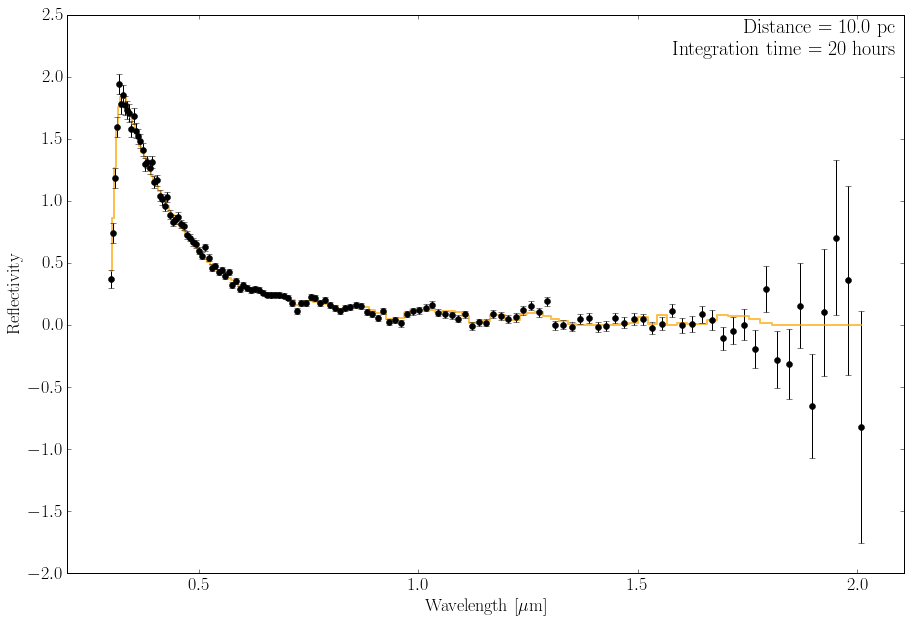

In [22]:
lam, spec, sig, wlhr, Ahr = \
coronagraph.smart_observation(smart_rad_file, integration_time, telescope, planet, star, plot=True, tag=tag)

### Or if you have your own high resolution reflectivity spectrum and want to observe it, call `coronagraph.generate_observation()`

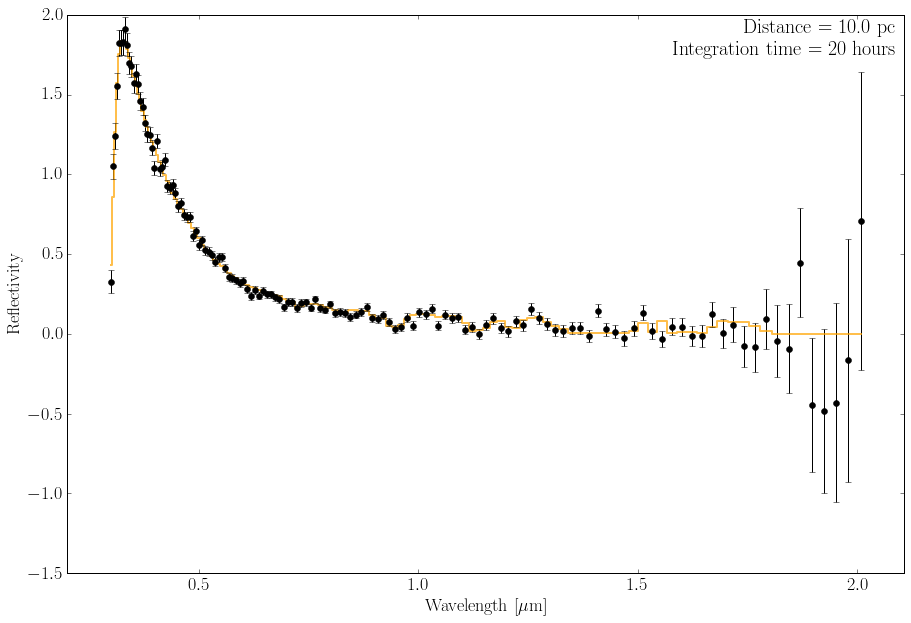

In [23]:
lam, spec, sig = \
coronagraph.generate_observation(wlhr, Ahr, integration_time, telescope, planet, star, plot=True, tag=tag)

### Now suppose you want to impose a limit on the long wavelength end of the spectrum to remove the uncertain points on the far right... 

In [24]:
telescope.lammax = 1.6

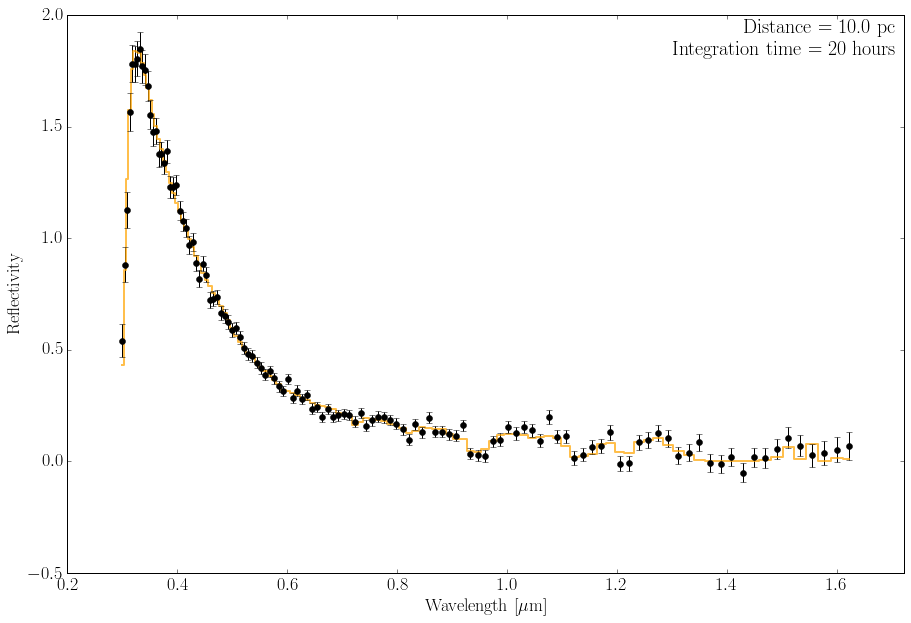

In [25]:
lam, spec, sig, wlhr, Ahr = \
coronagraph.smart_observation(smart_rad_file, integration_time, telescope, planet, star, plot=True, tag=tag)

### Or instead, you could cryogenically cool the telescope so that the internal thermal photons don't dominate the long wavelength end. In this case we can push out farther into the mid IR...

In [30]:
telescope.lammax = 4.5
telescope.temperature = 77.0 # Kelvin (Liquid Nitrogen)

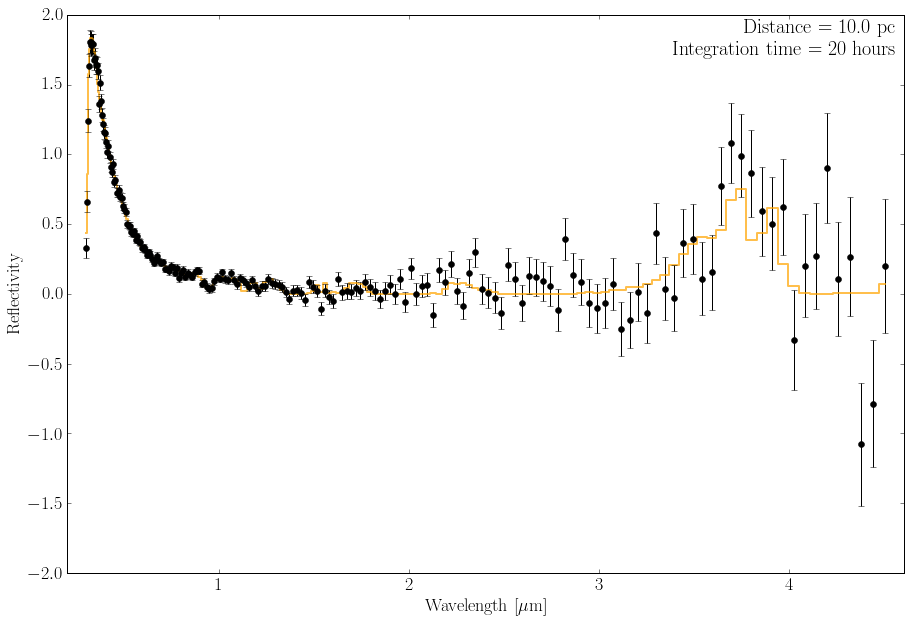

In [31]:
lam, spec, sig, wlhr, Ahr = \
coronagraph.smart_observation(smart_rad_file, integration_time, telescope, planet, star, plot=True, tag=tag)

### Now, you can create your own telescopes, planets, and stars!